In [36]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [37]:
def som_pie_grid(som, data, labels):
  """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
  labels_map = som.labels_map(data, labels)
  label_names = np.unique(labels)

  plt.figure(figsize=(70, 70))
  the_grid = GridSpec(70, 70)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][lab] for lab in label_names]
      plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.show()

  # Cheating way to align legend, create a separate figure just 
  # for legend.  Will have superfluous whitespace below
  plt.legend(patches, label_names, loc='upper left', ncol=5)
  plt.axis('off')
  plt.show()

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [38]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

In [39]:
df = pd.read_csv(data_url).dropna()

In [40]:
df = df[df.Pos.isin(['C', 'PG', 'SG'])]

In [41]:
cols = df.columns[(df.dtypes == int) | (df.dtypes == float)]
X = df[cols].copy()


In [42]:
# Call Sklearn scaling method
scale = StandardScaler()
X_std = scale.fit_transform(X)

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [61]:
som = MiniSom(x = 6, y = 3, input_len=len(cols), random_seed=39 )
som.pca_weights_init(X_std)
som.train_random(X_std, num_iteration=100)

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

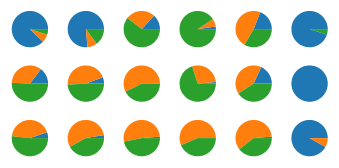

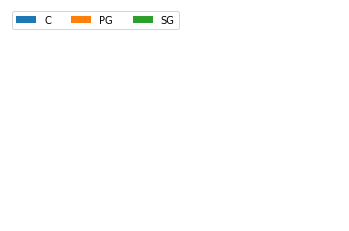

In [62]:
som_pie_grid(som, X_std, df['Pos'])

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

In [67]:
pca = PCA(n_components = 2) 
Xp = pd.DataFrame(pca.fit_transform(X_std), columns = ['x', 'y'])
Xp = pd.concat([df['Pos'], Xp], axis=1, join='inner')
Xp

,Pos,x,y
0,SG,-2.781979,-1.246254
2,PG,5.195114,5.726987
3,C,1.961253,3.681634
4,C,-5.837433,0.327246
6,SG,-3.872275,-0.179754
...,...,...,...
1147,PG,-2.126582,3.200369
1148,SG,-3.830782,0.084945
1151,PG,-3.816951,-0.639291
1152,PG,-2.333072,-2.028981


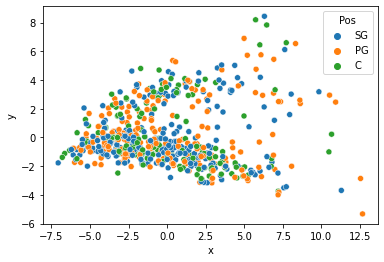

In [68]:

sns.scatterplot(data=Xp, x='x', y='y', hue='Pos')

I don't now what to make of this, actually. I can see that there may be some relationship, but when comparing a pie chart vs pca, I can understand that there's a way to better represent the dimensionality; visually to get a better idea of the clusters.

I am not entirely certain what it is I should be looking for with SOM, am I stuck on getting clusters that meet my expectations? I cannot say for certain that everything that has a C position is going to have all of the same characteristics. That same statement goes to PG and SG as well.  

While PCA in two dimensions keeps these predictions either too scattered or too dense, making it more difficult to discern which of these clusters are represented as they're clustered - it leads to less force.

At any rate. Som looks really cool and allows a visual representation that is greather than two dimensions, but those are a LOT of piecharts. 

If I'd time I'd see what it looks like in the Boston Marathon challenge I did the other day using the three dimensional map that was demonstrated in the recorded lecture. 

I suppose it might be fun to see the pie chart, too. 

What would I put in there as my dimensions? If I reduced my data from 12 features to 6; what's the 3d equivalent of that - I know that a 2d it's just, X = (my x component) and y = (my y component). I'd have to boil it down to three, wouldn't I? Further research is required to fully grasp how to use this concept. 

*My PCs busy scoring a KMeans model at the moment and it looks like it's going to take at least three days. Maybe longer to get that silhouette score. I might stop it and run a subset if it's not done by the time I wake up tomorrow morning because I'm testing 8 times or something and at eight hours per score; I'm not going to meet the deadline.*  